In [ ]:
# Importando bibliotecas usuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# importando bibliotecas para treino do modelo


In [ ]:
#Lendo novo Dataset depois de tratado e codificado
new_df_encoded = pd.read_csv('C:/Users/Usuario/Downloads/projeto pi/Machine-learning-AI/dataset_encoded.csv')
display(new_df_encoded.head())

,orgao_responsavel_Delegacia Boa Viagem,orgao_responsavel_Delegacia Casa Forte,orgao_responsavel_Delegacia Pina,orgao_responsavel_Delegacia Santo Amaro,orgao_responsavel_Delegacia Torre,dia_semana_1,dia_semana_2,dia_semana_3,dia_semana_4,dia_semana_5,...,tipo_crime_Homicídio,tipo_crime_Latrocínio,tipo_crime_Roubo,tipo_crime_Sequestro,tipo_crime_Tráfico de Drogas,tipo_crime_Violência Doméstica,ano,mes,dia,quantidade_ocorrencia
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,2024,8,2,1
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,2022,10,29,1
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2023,3,12,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2025,4,18,1
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,2025,6,30,1


In [7]:
#verificando os tipos de dados
print(new_df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   orgao_responsavel_Delegacia Boa Viagem   5000 non-null   float64
 1   orgao_responsavel_Delegacia Casa Forte   5000 non-null   float64
 2   orgao_responsavel_Delegacia Pina         5000 non-null   float64
 3   orgao_responsavel_Delegacia Santo Amaro  5000 non-null   float64
 4   orgao_responsavel_Delegacia Torre        5000 non-null   float64
 5   dia_semana_1                             5000 non-null   float64
 6   dia_semana_2                             5000 non-null   float64
 7   dia_semana_3                             5000 non-null   float64
 8   dia_semana_4                             5000 non-null   float64
 9   dia_semana_5                             5000 non-null   float64
 10  dia_semana_6                             5000 no

In [7]:
#ideia de clusterização por Kmeans recomendando qual tipo de crime está mais recorrente(mes, ano, semana), baseada na quantidade de ocorrências
old_df = pd.read_csv("../dataset_ocorrencias_delegacia_5.csv")
old_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_ocorrencia             5000 non-null   object 
 1   data_ocorrencia           5000 non-null   object 
 2   bairro                    5000 non-null   object 
 3   tipo_crime                5000 non-null   object 
 4   descricao_modus_operandi  5000 non-null   object 
 5   arma_utilizada            5000 non-null   object 
 6   quantidade_vitimas        5000 non-null   int64  
 7   quantidade_suspeitos      5000 non-null   int64  
 8   sexo_suspeito             5000 non-null   object 
 9   idade_suspeito            5000 non-null   int64  
 10  orgao_responsavel         5000 non-null   object 
 11  status_investigacao       5000 non-null   object 
 12  latitude                  5000 non-null   float64
 13  longitude                 5000 non-null   float64
dtypes: float

In [50]:
df = pd.read_csv("../Supervisionado/dataset_delegacias")
old_df = pd.read_csv("../dataset_ocorrencias_delegacia_5.csv")

df["idade_suspeito"] = old_df["idade_suspeito"]
group_cols = ['orgao_responsavel', 'tipo_crime', 'ano', 'mes', 'dia_semana_name']
# Para cada linha, conta quantas ocorrências existem para a combinação do grupo
df['quantidade_ocorrencia'] = df.groupby(group_cols)['tipo_crime'].transform('size')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   orgao_responsavel      5000 non-null   object
 1   ano                    5000 non-null   int64 
 2   mes                    5000 non-null   int64 
 3   dia_semana_name        5000 non-null   object
 4   tipo_crime             5000 non-null   object
 5   quantidade_ocorrencia  5000 non-null   int64 
 6   idade_suspeito         5000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 273.6+ KB


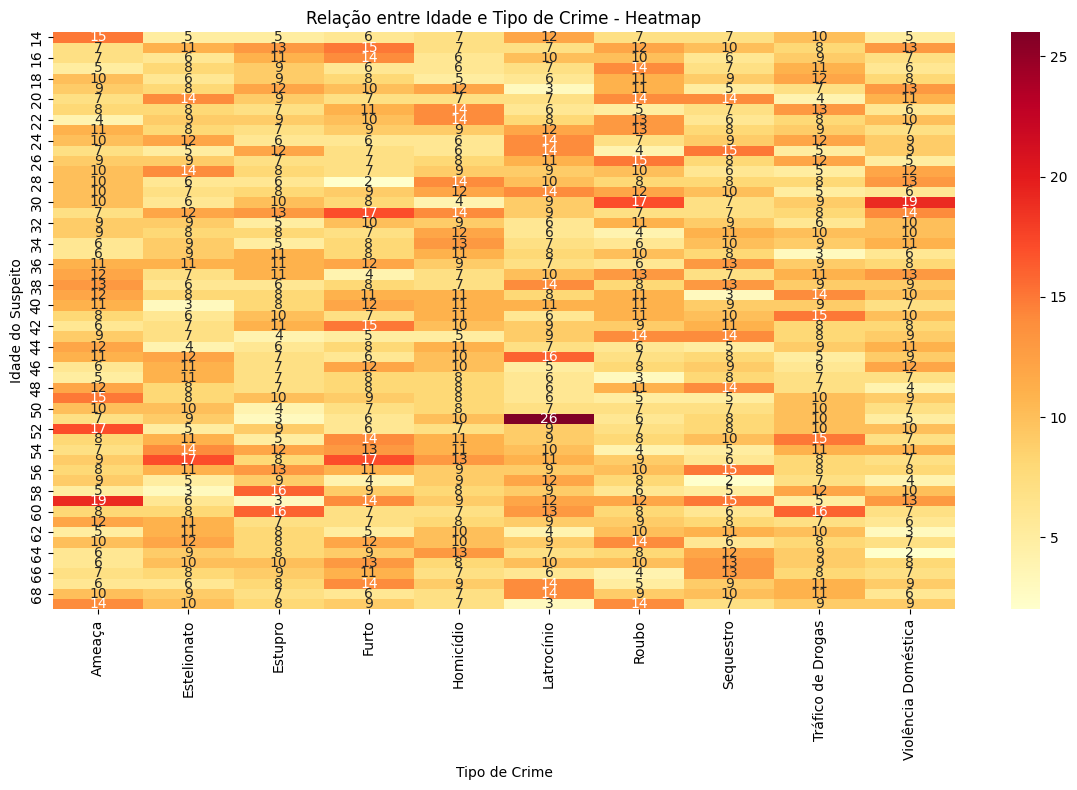

In [ ]:
# Vendo relação entre idade e tipo de crime
tabela_cruzada = pd.crosstab(df['idade_suspeito'], df['tipo_crime'])

plt.figure(figsize=(12, 8))
sns.heatmap(tabela_cruzada, annot=True, fmt='d', cmap='YlOrRd')
plt.xlabel('Tipo de Crime')
plt.ylabel('Idade do Suspeito')
plt.title('Relação entre Idade e Tipo de Crime - Heatmap')
plt.tight_layout()
plt.show()